In [6]:
import deblend
import om10
import desc.slrealizer
import warnings
warnings.filterwarnings("ignore")

In [7]:
db = om10.DB()
db.select_random(maglim=23.3,area=18000.0,IQ=0.75)
db.paint(synthetic=True)
realizer = desc.slrealizer.SLRealizer(catalog=db, observation="../../../data/twinkles_observation_history.csv")

OM10: Full db.lenses table contains 15658 systems
OM10: Initial db.sample contains 15658 systems
OM10: selection yields 2813 lenses


In [8]:
%matplotlib inline
%pylab inline
matplotlib.use('TkAgg')
matplotlib.rc('text', usetex=False)

Populating the interactive namespace from numpy and matplotlib


In [9]:
# Choose a good lens system, with large imsep and 4 images:
                      
wide = db.sample[np.where(db.sample['IMSEP'] > 1.0)]
print "Number of lenses with image separation > 1.0 arcsec = ",len(wide)

wide_quads = wide[np.where(wide['NIMG'] == 4)]
print "Number of these with 4 images = ",len(wide_quads)

bright_wide_quads = wide[np.where(wide_quads['MAGI'] < 22)]
print "Number of these with i3 < 22 = ",len(bright_wide_quads)

db.sample = bright_wide_quads    
                      
k = db.sample[0]['LENSID']

Number of lenses with image separation > 1.0 arcsec =  1924
Number of these with 4 images =  295
Number of these with i3 < 22 =  123


OM10: Extracted OM10 lens number 2318448:
 LENSID FLAGTYPE NIMG ZLENS ... i_SDSS_quasar z_SDSS_quasar u_SDSS_quasar
------- -------- ---- ----- ... ------------- ------------- -------------
2318448        0    2 0.364 ...         21.95 21.9298349555 23.8234447085
multiplication factor :  3.33659952736e-13
1.31844395596e-05
PSF_sigma:  0.427232221894
multiplication factor :  1.31844395596e-05
0.000163231863045
PSF_sigma:  0.427232221894
multiplication factor :  0.000163231863045
#####################BEFORE DEBLEND PLOT LENSES##################################


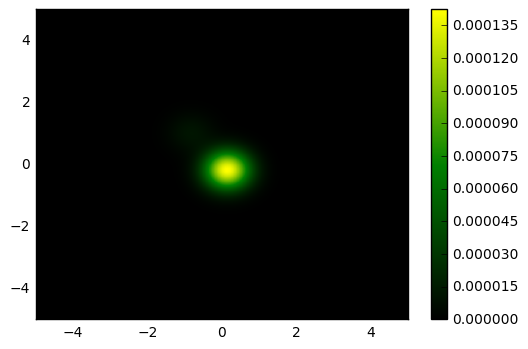

OM10: Extracted OM10 lens number 2318448:
 LENSID FLAGTYPE NIMG ZLENS ... i_SDSS_quasar z_SDSS_quasar u_SDSS_quasar
------- -------- ---- ----- ... ------------- ------------- -------------
2318448        0    2 0.364 ...         21.95 21.9298349555 23.8234447085
multiplication factor :  3.33659952736e-13
1.31844395596e-05
PSF_sigma:  0.427232221894
multiplication factor :  1.31844395596e-05
0.000163231863045
PSF_sigma:  0.427232221894
multiplication factor :  0.000163231863045
zeroth_moment 1.76416302938
first_moment (487.72323073897445, 505.13054463368951)
x_bar and y_bar:  505.130544634 487.723230739
[computed] x_bar and y_bar:  487.723230739 505.130544634
data sum:  1.76416302938
second_moment [[ 11272.49460266   7684.15573189]
 [  7684.15573189  -5672.24095906]]
x_bar and y_bar:  505.130544634 487.723230739
[computed] x_bar and y_bar:  487.723230739 505.130544634
data sum:  1.76416302938


ValueError: the input matrix must be positive semidefinite

In [10]:
realizer.deblend(lensID=k, null_deblend=True, debug=False)